<a href="https://colab.research.google.com/github/Gizem-kaya/Linear-SVM-Kernel-Trick/blob/main/SVM_Kernel_Trick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

In [2]:
with open('C1__pts.txt') as f:
    lines = (line for line in f)
    c1 = np.loadtxt(lines, skiprows=4)

with open('C2__pts.txt') as f:
    lines = (line for line in f)
    c2 = np.loadtxt(lines, skiprows=4)
"""
label_column = np.zeros((100,), dtype=int)
c1 = np.insert(c1, 2, label_column, axis=1)

label_column.fill(1)
c2 = np.insert(c2, 2, label_column, axis=1)
"""

'\nlabel_column = np.zeros((100,), dtype=int)\nc1 = np.insert(c1, 2, label_column, axis=1)\n\nlabel_column.fill(1)\nc2 = np.insert(c2, 2, label_column, axis=1)\n'

In [3]:
dataset = np.concatenate((c1, c2), axis=0)
#print(dataset)

In [4]:
label = np.zeros((200,), dtype=int)
label[100:201] = 1
#print(label)

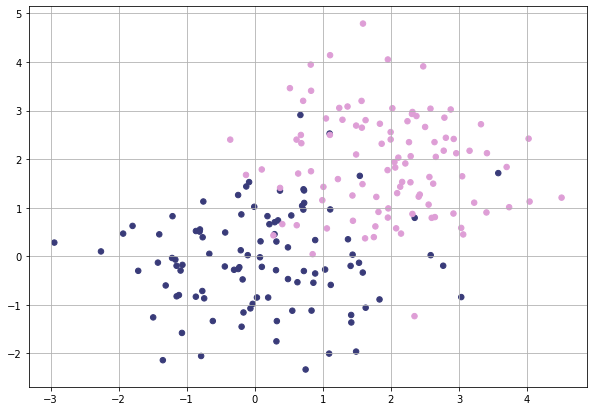

In [5]:
plt.figure(figsize=(10,7))
plt.scatter(dataset[:, 0], dataset[:, 1], c=label, s=30, cmap='tab20b')
plt.grid()
plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.10)

In [7]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [8]:
print('Accuracy without Kernel Trick: ' + str(accuracy_score(y_pred, y_test)))

Accuracy without Kernel Trick: 0.95


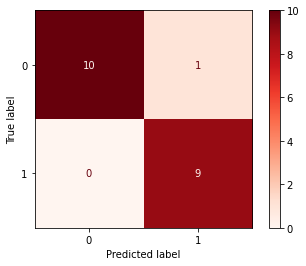

In [9]:
plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Reds)  
plt.show()  

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


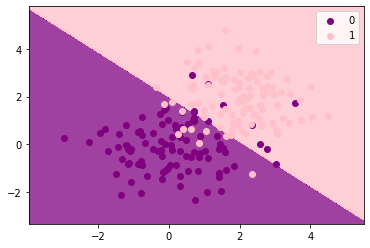

In [10]:
X_set, y_set = dataset, label
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01), np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('purple', 'pink')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
    c = (ListedColormap(('purple', 'pink')))(i), label = j)
  
plt.legend()
plt.show()

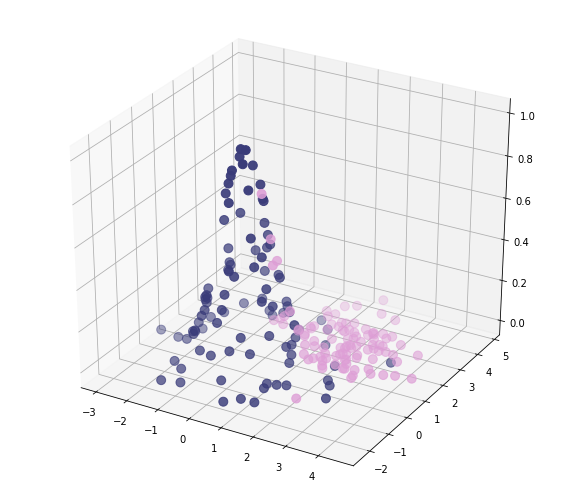

In [11]:
fig = plt.figure(figsize=(10,9))
fig = plt.subplot(projection='3d')
fig.scatter3D(dataset[:, 0], dataset[:, 1], np.exp(-(dataset ** 2).sum(1)), c=label, s=80, cmap='tab20b')
plt.show()

In [12]:
dataset_with_kernel_trick = copy.deepcopy(dataset)
dataset_with_kernel_trick = np.insert(dataset_with_kernel_trick, 2, np.exp(-(dataset ** 2).sum(1)), axis=1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(dataset_with_kernel_trick, label, test_size = 0.10)

In [14]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

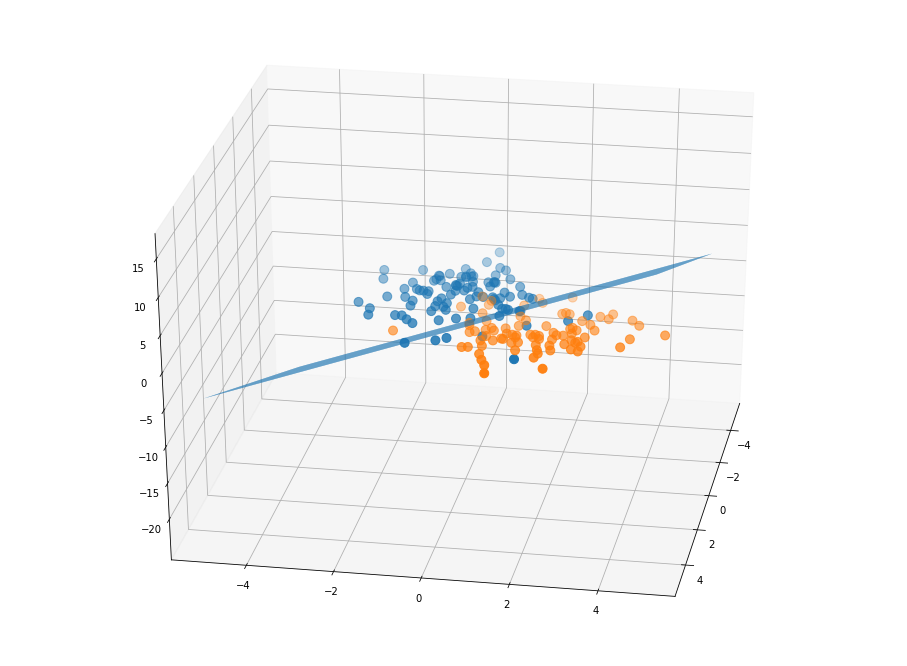

In [15]:
z = lambda x,y: (-classifier.intercept_[0]-classifier.coef_[0][0]*x -classifier.coef_[0][1]*y) / classifier.coef_[0][2]

tmp = np.linspace(-5,5,30)
x,y = np.meshgrid(tmp,tmp)

fig = plt.figure(figsize=(16,12))
ax  = fig.add_subplot(111, projection='3d')
ax.scatter3D(X_train[y_train==0,0], X_train[y_train==0,1], X_train[y_train==0,2],'ob',s=80)
ax.scatter3D(X_train[y_train==1,0], X_train[y_train==1,1], X_train[y_train==1,2],'sr',s=80)
ax.plot_surface(x, y, z(x,y))
ax.view_init(30, 10)
plt.show()

In [16]:
print('Accuracy with Kernel Trick: ' + str(accuracy_score(y_pred, y_test)))

Accuracy with Kernel Trick: 1.0


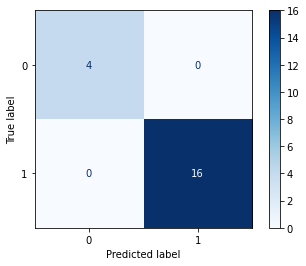

In [17]:
plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()  